In [296]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

___
# Loading data

### Helper Function

In [297]:
def load_data(path, max_features):
    root = "../../"
    filename = root + path
    infile = open(filename,'rb')
    performance = pickle.load(infile)
    infile.close()

    fs = pd.DataFrame()
    fs["Accuracy"] = [performance[i]["Accuracy"].mean() for i in range(0,max_features)]
    fs["Precision"] = [performance[i]["Precision"].mean() for i in range(0,max_features)]
    fs["Recall"] = [performance[i]["Recall"].mean() for i in range(0,max_features)]
    fs["F1_Score"] = [performance[i]["F1_Score"].mean() for i in range(0,max_features)]
    fs["Fit_Time"] = [performance[i]["Fit_Time"].mean() for i in range(0,max_features)]
    fs["Batch_Predict_Time"] = [performance[i]["Predict_Time"].mean() for i in range(0,max_features)]
    fs["Sample_Predict_Time"] = [(performance[i]["Predict_Time"]/performance[i]["Test_Size"]).mean()
                                    for i in range(0,max_features)]
    fs["Score_Time"] = [performance[i]["Score_Time"].mean() for i in range(0,max_features)]
    fs.index = pd.RangeIndex(start=1, stop=max_features+1, step=1)

    fs_std = pd.DataFrame()
    fs_std["Accuracy"] = [performance[i]["Accuracy"].std() for i in range(0,max_features)]
    fs_std["Precision"] = [performance[i]["Precision"].std() for i in range(0,max_features)]
    fs_std["Recall"] = [performance[i]["Recall"].std() for i in range(0,max_features)]
    fs_std["F1_Score"] = [performance[i]["F1_Score"].std() for i in range(0,max_features)]
    fs_std["Fit_Time"] = [performance[i]["Fit_Time"].std() for i in range(0,max_features)]
    fs_std["Predict_Time"] = [performance[i]["Predict_Time"].std() for i in range(0,max_features)]
    fs_std["Score_Time"] = [performance[i]["Score_Time"].std() for i in range(0,max_features)]
    fs_std.index = pd.RangeIndex(start=1, stop=max_features+1, step=1)

    fs_bcr = pd.DataFrame()
    fs_bcr["Accuracy"] = fs["Accuracy"]/fs["Fit_Time"]
    fs_bcr["Precision"] = fs["Precision"]/fs["Fit_Time"]
    fs_bcr["Recall"] = fs["Recall"]/fs["Fit_Time"]
    fs_bcr["F1_Score"] = fs["F1_Score"]/fs["Fit_Time"]

    # fs_bcr["Accuracy"] = fs["Accuracy"]/np.tanh(fs["Fit_Time"])
    # fs_bcr["Precision"] = fs["Precision"]/np.tanh(fs["Fit_Time"])
    # fs_bcr["Recall"] = fs["Recall"]/np.tanh(fs["Fit_Time"])
    # fs_bcr["F1_Score"] = fs["F1_Score"]/np.tanh(fs["Fit_Time"])


    return fs, fs_std, fs_bcr

### Load pickles

In [298]:
mi, mi_std, mi_bcr = load_data("pickles/binary/pfm_mi.pkl", 40)

<AxesSubplot:>

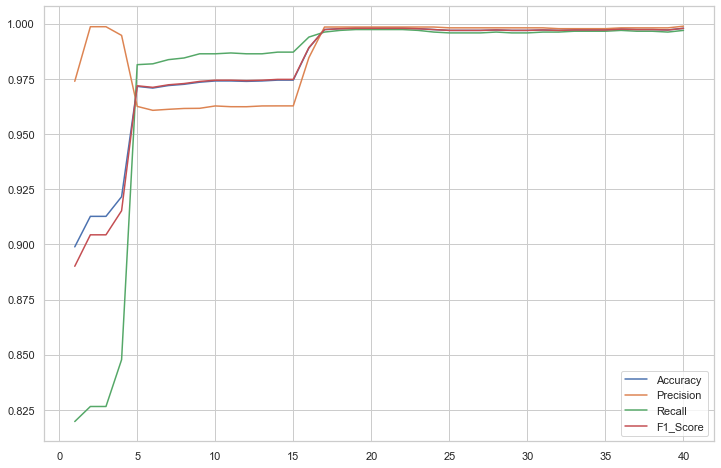

In [299]:
mi[["Accuracy", "Precision", "Recall", "F1_Score"]].plot()

<AxesSubplot:>

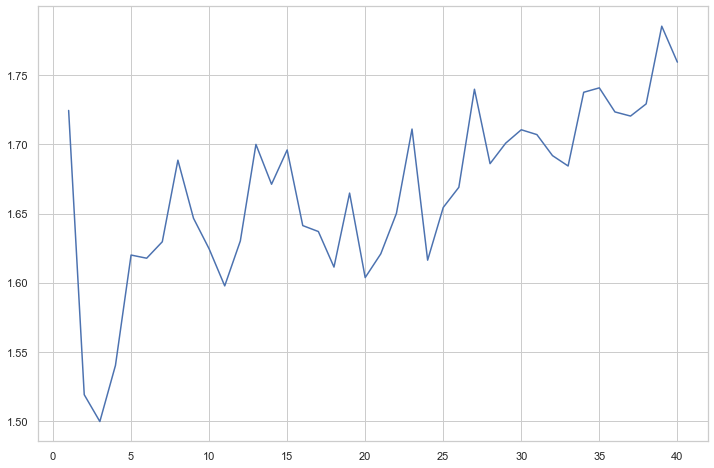

In [300]:
mi["Fit_Time"].plot()

<AxesSubplot:>

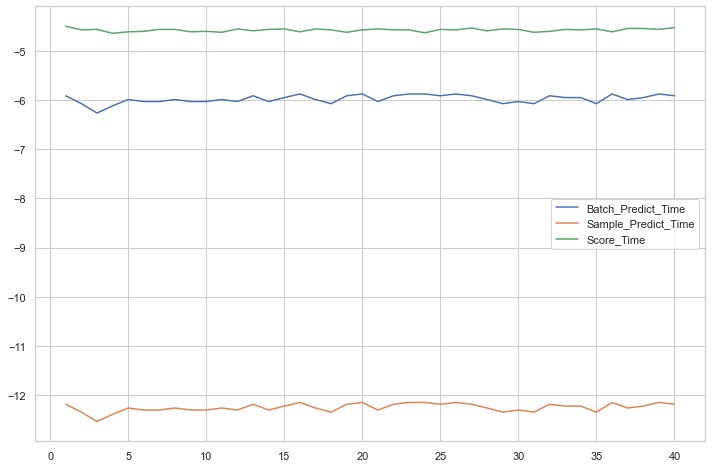

In [301]:
np.log(mi[["Batch_Predict_Time", "Sample_Predict_Time", "Score_Time"]]).plot()

<AxesSubplot:>

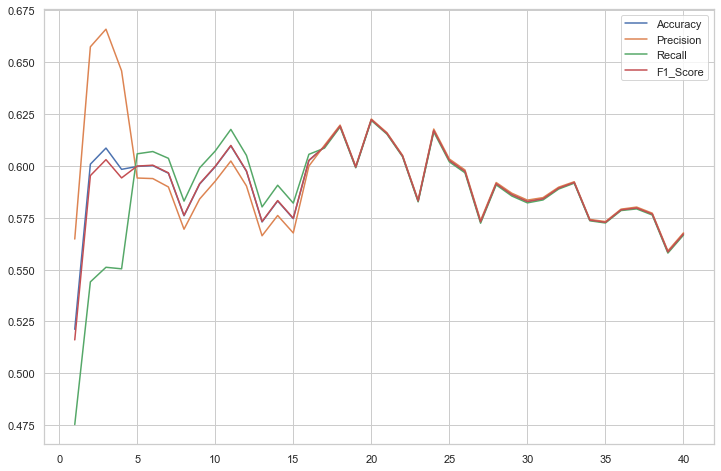

In [302]:
mi_bcr.plot()

In [303]:
anova, anova_std, anova_bcr = load_data("pickles/binary/pfm_anova.pkl", 40)
relieff, relieff_std, relieff_bcr = load_data("pickles/binary/pfm_relieff.pkl", 40)
xgb_gain, xgb_gain_std, xgb_gain_bcr = load_data("pickles/binary/pfm_xgb_gain.pkl", 40)
wrfs, wrfs_std, wrfs_bcr = load_data("pickles/binary/pfm_wrfs.pkl", 40)
rfe, rfe_std, rfe_bcr = load_data("pickles/binary/pfm_rfe.pkl", 40)

___
# Graphing performances

### Helper Function

In [304]:
def graph_metric(metric, stat, log=False):
    if stat == "Mean":
        df = pd.concat([mi[metric], 
            anova[metric], 
            relieff[metric], 
            rfe[metric],
            xgb_gain[metric], 
            wrfs[metric]], axis=1)
        title = "Binary Classifier: " + metric + " - 10-fold CV " + stat
    elif stat == "Standard Deviation":
        df = pd.concat([mi_std[metric], 
            anova_std[metric], 
            relieff_std[metric], 
            rfe_std[metric],
            xgb_gain_std[metric], 
            wrfs_std[metric]], axis=1)
        title = "Binary Classifier: " + metric + " - 10-fold CV " + stat
    else:
        df = pd.concat([mi_bcr[metric], 
            anova_bcr[metric], 
            relieff_bcr[metric], 
            rfe_bcr[metric],
            xgb_gain_bcr[metric], 
            wrfs_bcr[metric]], axis=1)
        title = "Binary Classifier: " + metric + " - Benefit-Cost Ratio"
    
    df.columns=["Mutual Information", "ANOVA", "ReliefF", "RFE", "XGBoost Gain", "Ensemble"]
    #df.columns=["Mutual Information", "ANOVA", "ReliefF", "XGBoost Gain", "WRFS"]

    sns.set(rc={'figure.figsize':(12,8)})
    sns.set_style("whitegrid")
    ax = sns.lineplot(data=df, markers=["v","o","s","^","d","P"])
    
    if stat == "Benefit-Cost Ratio":
        ax.set_ylabel(metric + "/Fit Time", fontsize=16, labelpad=8)
    else:
        ax.set_ylabel(metric, fontsize=16, labelpad=8)
    if log:
        ax.set(yscale="log")
    if metric == "Fit_Time":
        ax.set_ylabel("Runtime (seconds)", fontsize=16, labelpad=8)

    ax.set_title(title, fontsize=18, pad=12)    
    ax.set_xlabel("Number of Features", fontsize=16, labelpad=8)
    if stat == "Standard Deviation" or metric == "Fit_Time":
        ax.legend(loc = "upper right", fancybox=True, shadow=True, fontsize="large")
    else:
        ax.legend(loc = "lower right", fancybox=True, shadow=True, fontsize="large")

    plt.xlim(0)

## Accuracy

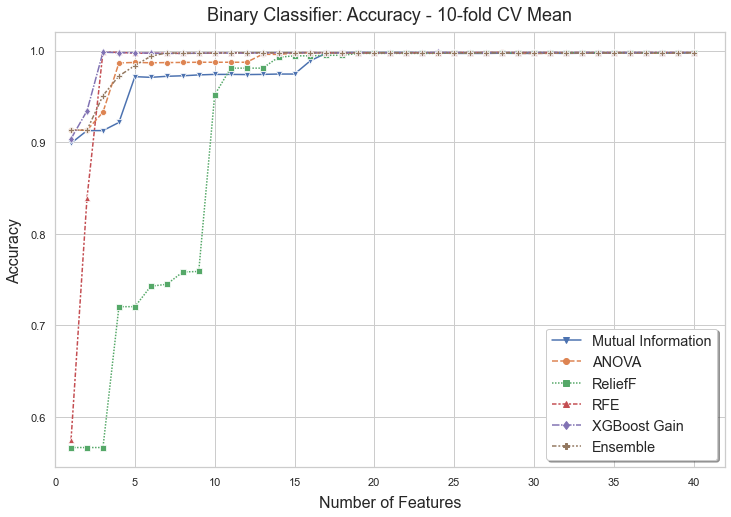

In [305]:
graph_metric("Accuracy", "Mean")

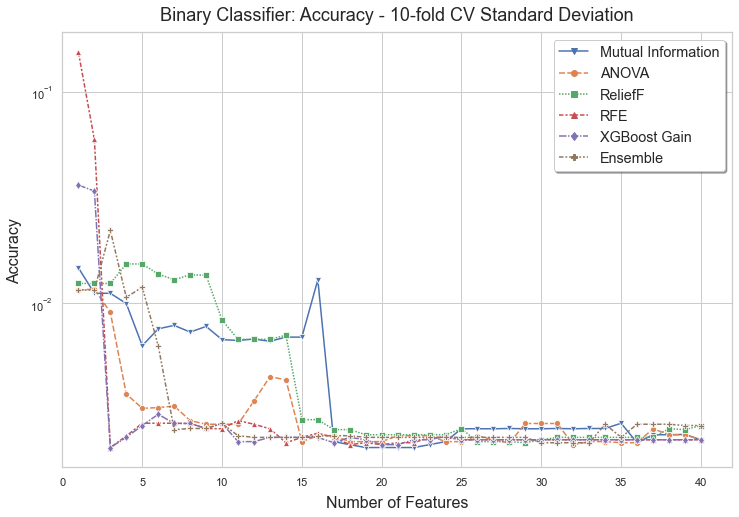

In [306]:
graph_metric("Accuracy", "Standard Deviation", log=True)

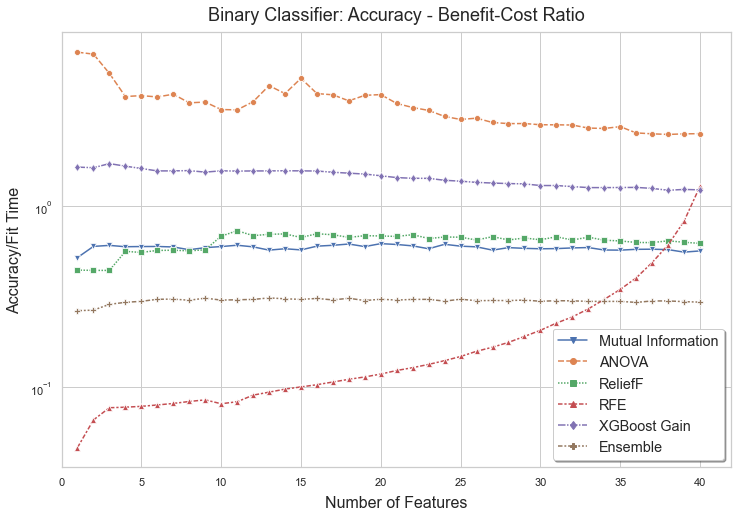

In [307]:
graph_metric("Accuracy", "Benefit-Cost Ratio", log=True)

## Precision

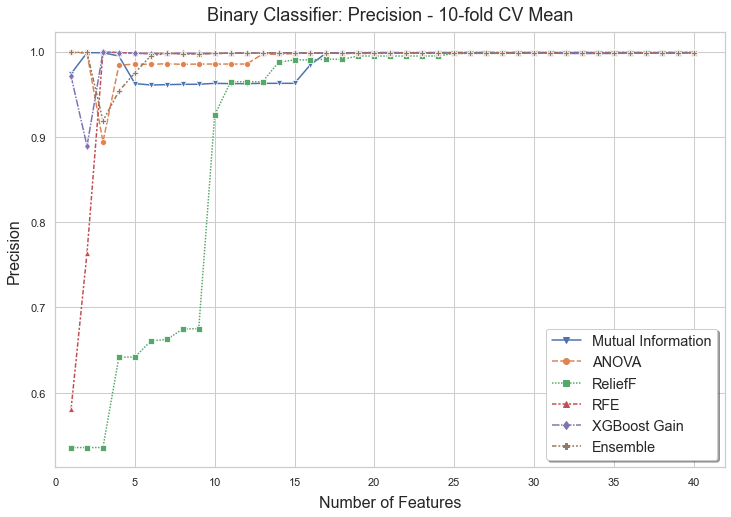

In [308]:
graph_metric("Precision", "Mean")

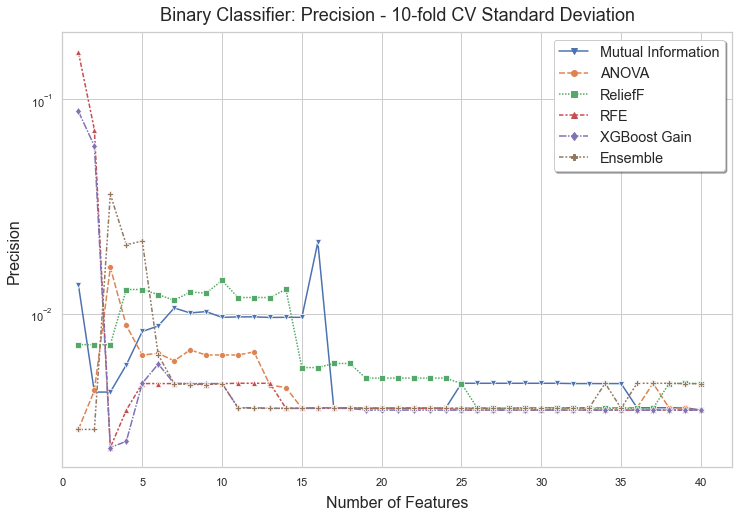

In [309]:
graph_metric("Precision", "Standard Deviation", log=True)

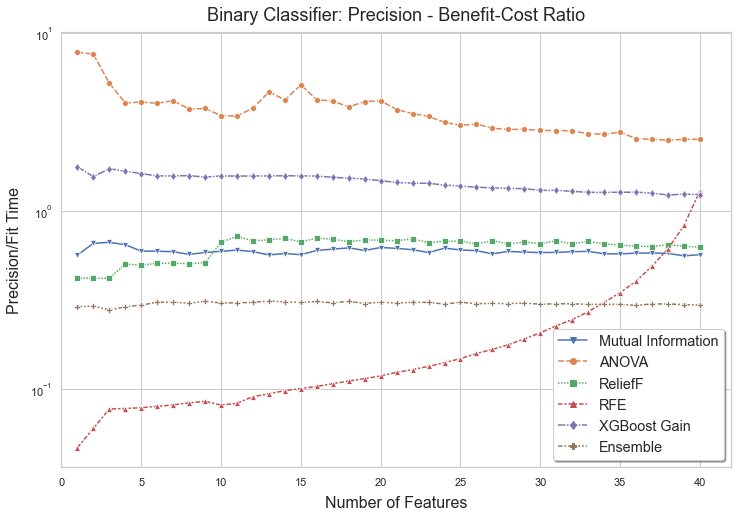

In [310]:
graph_metric("Precision", "Benefit-Cost Ratio", log=True)

## Recall

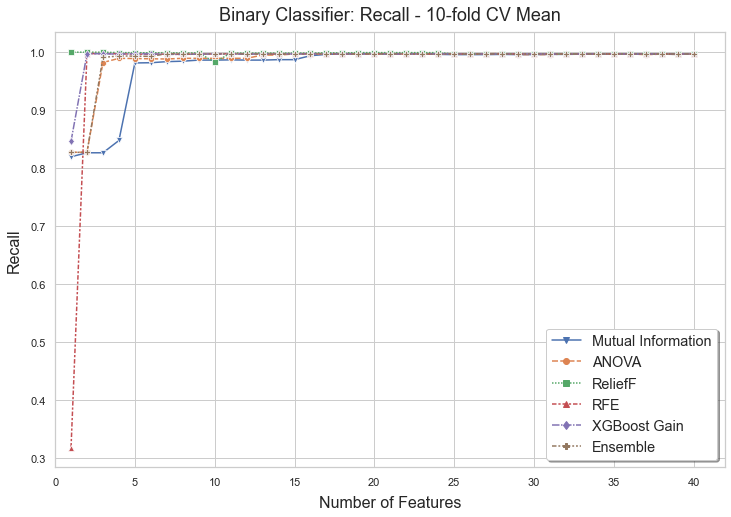

In [311]:
graph_metric("Recall", "Mean", log=False)

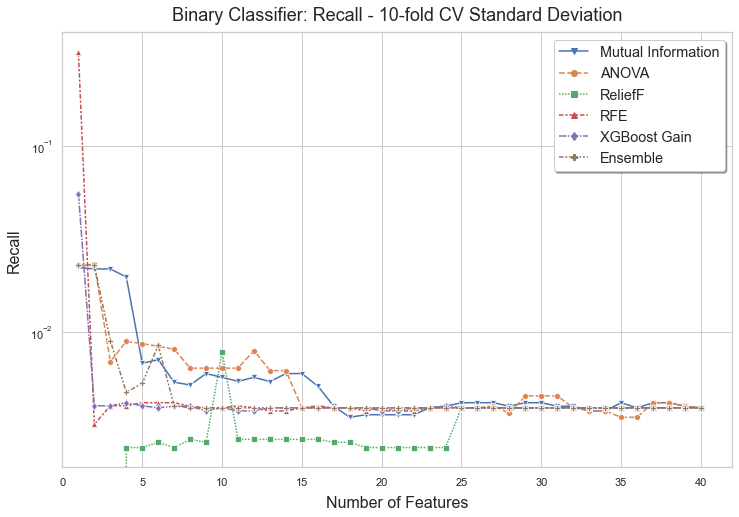

In [312]:
graph_metric("Recall", "Standard Deviation", log=True)

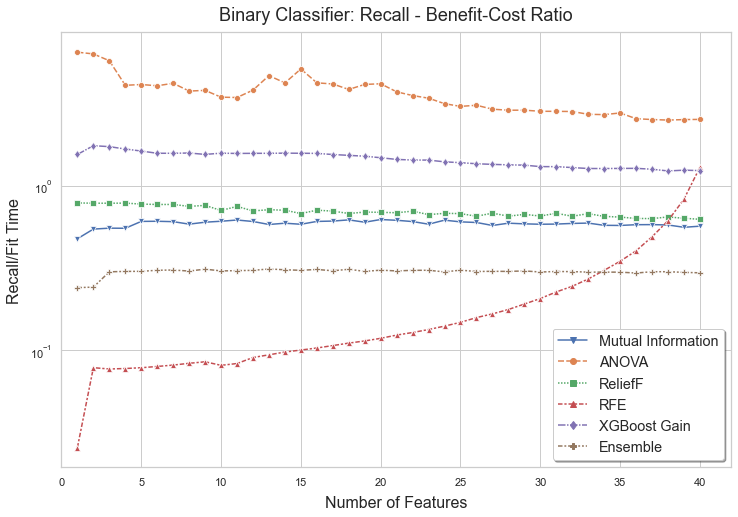

In [313]:
graph_metric("Recall", "Benefit-Cost Ratio", log=True)

## F1 Score

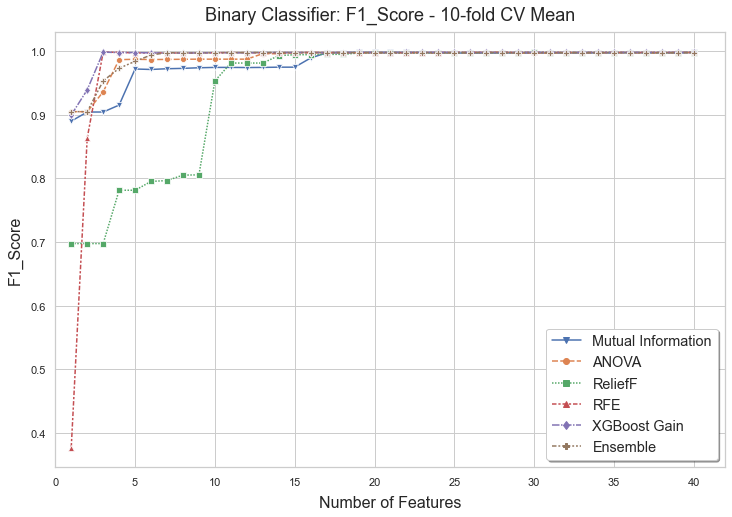

In [314]:
graph_metric("F1_Score", "Mean", log=False)
plt.savefig("../../pictures/vector/04_binary_f1_mean.svg")

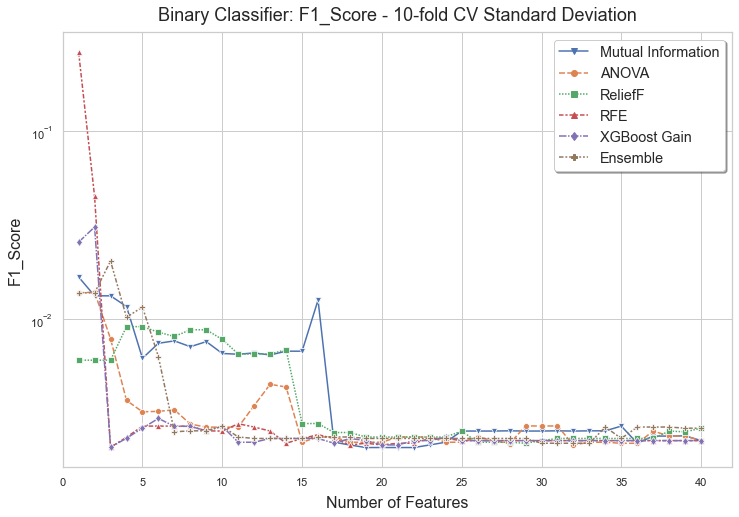

In [315]:
graph_metric("F1_Score", "Standard Deviation", log=True)
plt.savefig("../../pictures/vector/05_binary_f1_std.svg")

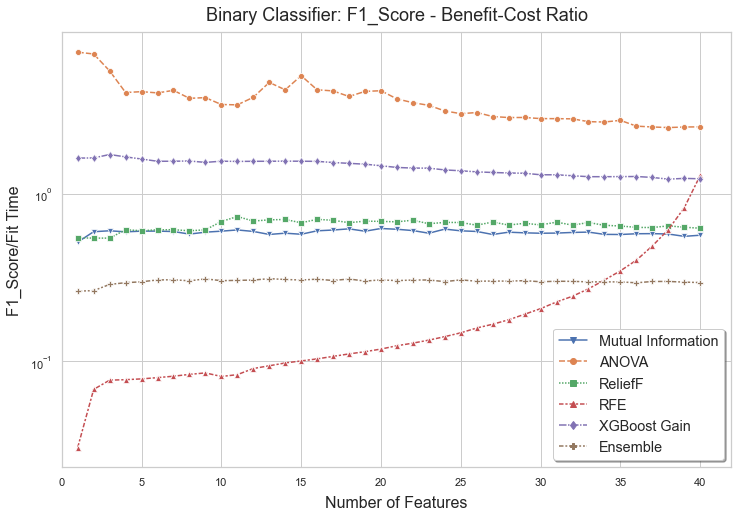

In [316]:
graph_metric("F1_Score", "Benefit-Cost Ratio", log=True)
plt.savefig("../../pictures/vector/07_binary_f1_bcr.svg")

___

## Fit Times

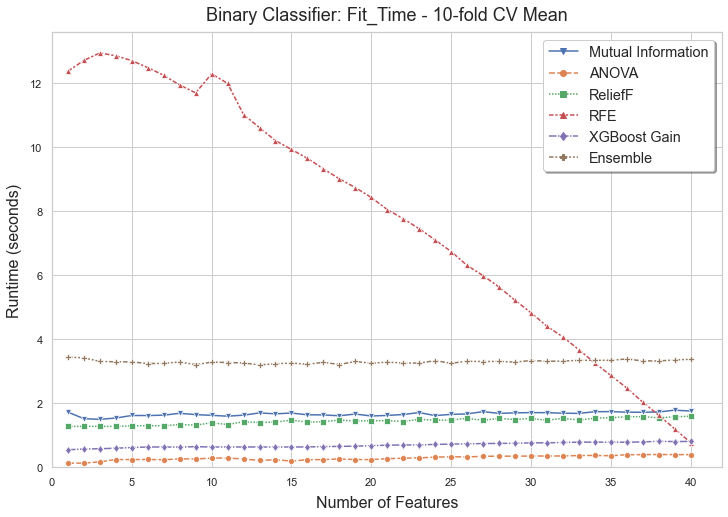

In [317]:
graph_metric("Fit_Time", "Mean", log=False)
plt.ylim(0)
plt.savefig("../../pictures/vector/06_binary_fit_times.svg")

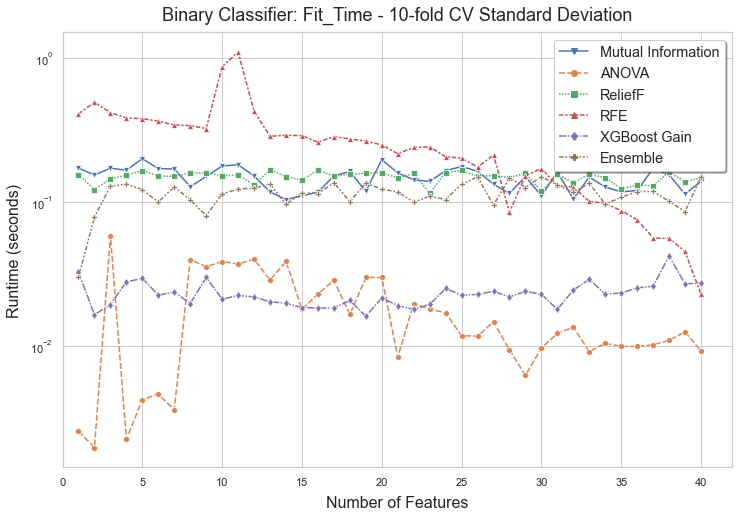

In [318]:
graph_metric("Fit_Time", "Standard Deviation", log=True)

## Predict Times

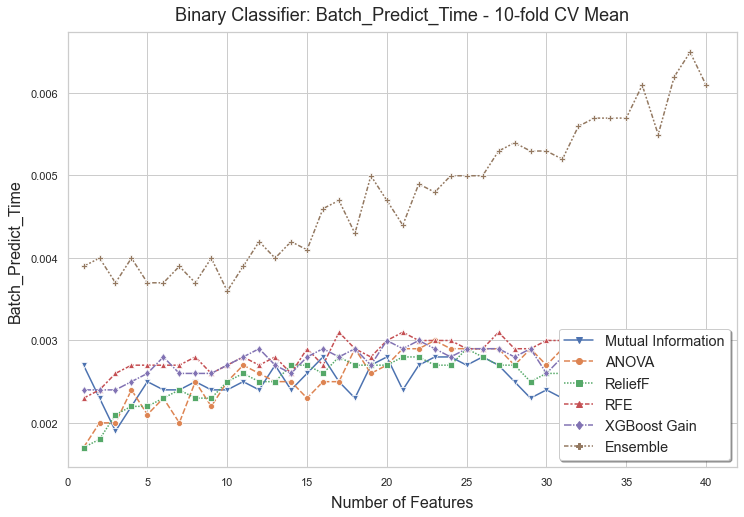

In [319]:
graph_metric("Batch_Predict_Time", "Mean", log=False)

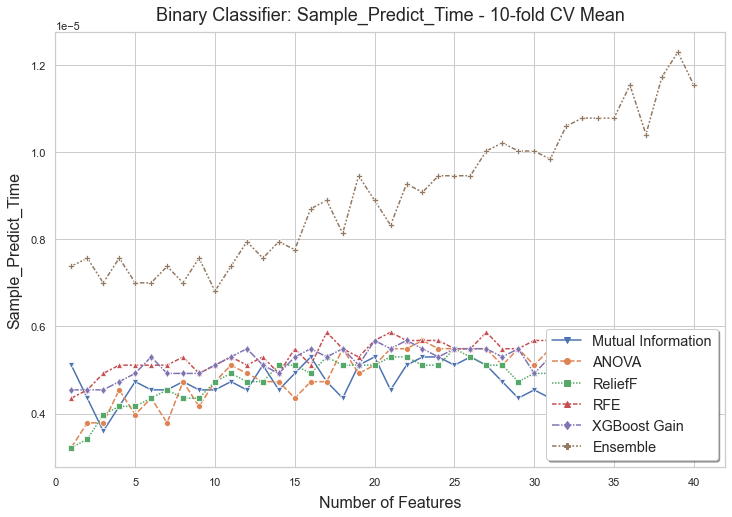

In [320]:
graph_metric("Sample_Predict_Time", "Mean", log=False)

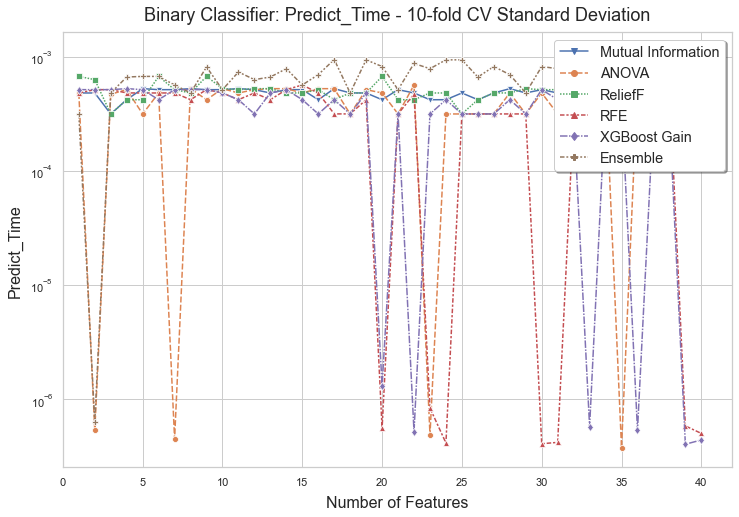

In [321]:
graph_metric("Predict_Time", "Standard Deviation", log=True)

## Score Times

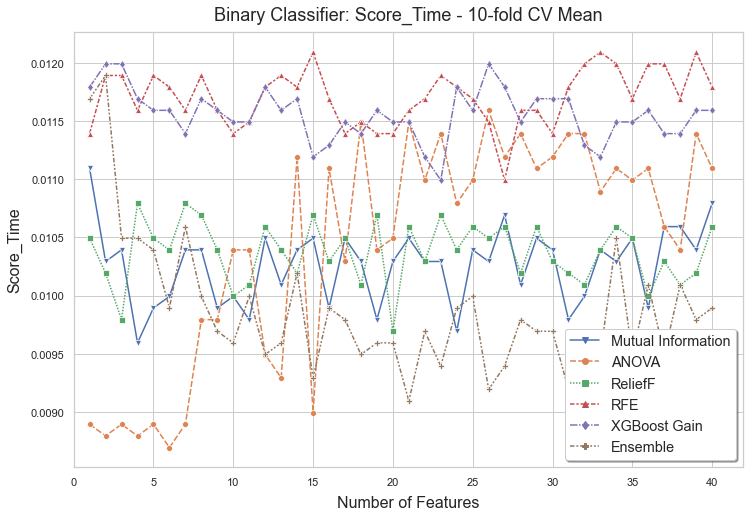

In [322]:
graph_metric("Score_Time", "Mean", log=False)

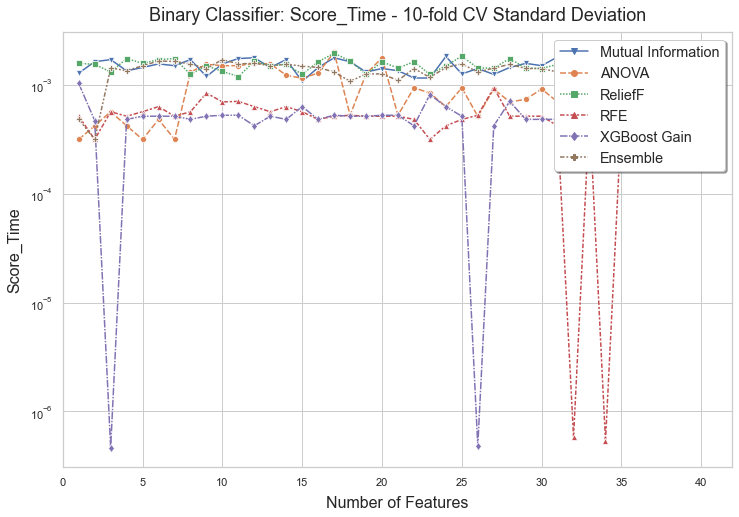

In [323]:
graph_metric("Score_Time", "Standard Deviation", log=True)